In [202]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.mlab import psd
from steapy import *
import os
import numpy
from numpy import *
import math
from scipy import integrate, linalg
from matplotlib import pyplot
from pylab import *
import sympy
from sympy.abc import x, y

### Steady background flow around the airfoil

In [203]:
x=1
m=0.03
p=0.4
t=0.12
c=1

coordinates_symmetrical(x, t, c)
#coordinate = coordinates_cambered(x, m, p, t, c)

'''
Comment or Incomment the file path for the specific type of airfoil

'''
# load geometry from data file
naca_filepath = os.path.abspath('NACA'+'_'+'00'+str(int(t*100))+'.txt') #SYMMETRICAL
#naca_filepath = os.path.abspath('NACA'+'_'+str(int(m*100))+str(int(p*10))+str(int(t*100))+'.txt') #CAMBERED
with open(naca_filepath, 'r') as infile:
    x, y = numpy.loadtxt(infile, dtype=float, unpack=True)

# discretize geoemetry into panels
panels = define_panels(x, y, N=40)

# define freestream conditions
freestream = Freestream(u_inf=1.0, alpha=0.0)

#solve the source contribution
A_source = source_contribution_normal(panels)

#solve the vortex contribution
B_vortex = vortex_contribution_normal(panels)

#build LHS and RHS
A = build_singularity_matrix(A_source, B_vortex)
b = build_freestream_rhs(panels, freestream)

# solve for singularity strengths
strengths = numpy.linalg.solve(A, b)

# store source strength on each panel
for i , panel in enumerate(panels):
    panel.sigma = strengths[i]
    
# store circulation density
gamma = strengths[-1]

[[5.00000000e-01 3.40155564e-04 4.30771154e-04 ... 5.01896142e-02
  1.58111619e-01 3.12646593e-01]
 [3.52546184e-05 5.00000000e-01 4.26442149e-04 ... 1.16130459e-01
  2.93882643e-01 1.64439946e-02]
 [6.59302673e-05 1.54014104e-04 5.00000000e-01 ... 2.66825827e-01
  3.37155191e-02 1.87039857e-03]
 ...
 [2.48486684e-03 3.37155191e-02 2.66825827e-01 ... 5.00000000e-01
  1.54014104e-04 1.04316880e-03]
 [2.02743243e-02 2.93882643e-01 1.16130459e-01 ... 4.26442149e-04
  5.00000000e-01 7.79234836e-03]
 [2.60773240e-01 2.20473585e-01 8.90788829e-02 ... 4.46929298e-02
  5.80760078e-02 5.00000000e-01]]
[[ 0.         -0.30854015 -0.13950998 ... -0.12723681 -0.20606565
   0.14291543]
 [ 0.08184394  0.         -0.23128594 ... -0.16833839  0.06088799
   0.08549521]
 [ 0.02698809  0.12697675  0.         ...  0.05085858  0.10952467
   0.03009426]
 ...
 [-0.02641539 -0.10952467 -0.05085858 ...  0.         -0.12697675
  -0.03031634]
 [-0.07255868 -0.06088799  0.16833839 ...  0.23128594  0.
  -0.09051304

### Plot the velocity field

<function random_y at 0x000000000BFDFF98>
[(-1.0, array([-0.49985533]))]
(array([-1.0], dtype=object), array([array([-0.49985533])], dtype=object))
[[-0.9502859741043787 array([-0.50010565])]]
[[-0.9005831044542187 array([-0.50038071])]]
[[-0.8508912887426765 array([-0.50068362])]]
[[-0.8012101683934947 array([-0.50101795])]]
[[-0.7515390318201516 array([-0.50138779])]]
[[-0.7018766867194972 array([-0.50179775])]]
[[-0.652221292796471 array([-0.50225307])]]
[[-0.6025701449591987 array([-0.50275959])]]
[[-0.5529193964301761 array([-0.5033238])]]
[[-0.503263712498219 array([-0.50395275])]]
[[-0.4535958507121194 array([-0.50465389])]]
[[-0.40390617522825795 array([-0.50543475])]]
[[-0.35418213597803117 array([-0.50630245])]]
[[-0.3044077819194919 array([-0.50726286])]]
[[-0.2545634342081933 array([-0.50831943])]]
[[-0.20462571388946876 array([-0.50947172])]]
[[-0.1545681768974262 array([-0.51071352])]]
[[-0.10436280990651672 array([-0.51203107])]]
[[-0.05398252110726094 array([-0.51340165

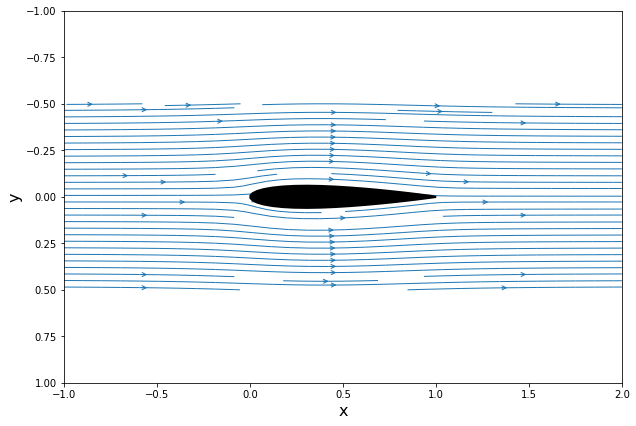

In [205]:
#define a mesh grid
nx, ny = 50, 50  # number of points in the x and y directions
x_start, x_end = -1.0, 2.0
y_start, y_end = -0.5, 0.5
X, Y = numpy.meshgrid(numpy.linspace(x_start, x_end, nx),
                      numpy.linspace(y_start, y_end, ny))

#compute the velocity field on the mesh grid
u, v = get_velocity_field(panels, freestream, X, Y)

#plot the velocity field
width = 10
import numpy as np
y_start, y_end = -0.5, 0.5

ylim = y_start, y_end

def random_y(ylim):
    yrange = np.diff(ylim)
    return yrange * np.random.rand(1)[0] + ylim[0]

random_y(ylim)
print (random_y)


pts = [] # empty list
pts = list(pts)
pts.append((x_start, random_y(ylim)))
print pts
pts = np.asarray(pts)
x, y = np.asarray(pts).transpose()
print (x,y)

for i in range(0,100):

    dt = 0.05
#    u, v = get_velocity_field(panels, freestream, x, y)
#    print (u,v)

    vel = (np.asarray(get_velocity_field(panels, freestream, x, y))).T
#    print (vel)
    pts = pts + (vel*dt)
    x, y = np.asarray(pts).transpose()
    print (pts)
pyplot.figure(figsize=(width, width))
#pyplot.figure(figsize=(20,20))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.streamplot(X, Y, u, v,
                 density=1, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.fill([panel.xc for panel in panels],
           [panel.yc for panel in panels],
           color='k', linestyle='solid', linewidth=2, zorder=3)
pyplot.axis('scaled', adjustable='box')
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.ylim(1,-1)
#pyplot.title('Streamlines around a NACA 0012 airfoil (AoA = ${}^o$)'.format(alpha), fontsize=16);
# savefig('Velo_NACA'+'_'+str(int(m*100))+str(int(p*10))+str(int(t*100))+'.pdf')
show()

### Tracer particle coordinates

In [206]:
import numpy as np
y_start, y_end = -0.5, 0.5

ylim = y_start, y_end

def random_y(ylim):
    yrange = np.diff(ylim)
    return yrange * np.random.rand(1)[0] + ylim[0]

random_y(ylim)
print (random_y)

vortx = x_start
vorty = random_y(ylim)
vortX = np.vstack((vortx,vorty))
print vortX

pts = [] # empty list
pts = list(pts)
pts.append((x_start, random_y(ylim)))
print pts
pts = np.asarray(pts)
x, y = np.asarray(pts).transpose()
print (x,y)

for i in range(0,100):

    dt = 0.05
#    u, v = get_velocity_field(panels, freestream, x, y)
#    print (u,v)

    vel = (np.asarray(get_velocity_field(panels, freestream, x, y))).T
#    print (vel)
    pts = pts + (vel*dt)
    x, y = np.asarray(pts).transpose()
    print (pts)

<function random_y at 0x000000000C0144A8>
[[-1.        ]
 [-0.14486009]]
[(-1.0, array([0.20415631]))]
(array([-1.0], dtype=object), array([array([0.20415631])], dtype=object))
[[-0.950412469916244 array([0.20427694])]]
[[-0.9008545582387173 array([0.20441234])]]
[[-0.8513295495457754 array([0.20456505])]]
[[-0.8018412056106465 array([0.20473819])]]
[[-0.7523938441048689 array([0.20493559])]]
[[-0.7029924277695776 array([0.20516203])]]
[[-0.6536426618305912 array([0.20542355])]]
[[-0.604351093120771 array([0.2057278])]]
[[-0.5551251957092603 array([0.20608464])]]
[[-0.5059734107074758 array([0.20650688])]]
[[-0.45690507427115157 array([0.20701139])]]
[[-0.40793010187217316 array([0.20762062])]]
[[-0.3590581681355315 array([0.20836478])]]
[[-0.31029687301472786 array([0.20928484])]]
[[-0.2616479212780871 array([0.21043642])]]
[[-0.2130995489879162 array([0.21189425])]]
[[-0.16461237507366 array([0.21375504])]]
[[-0.11609564285339828 array([0.21613269])]]
[[-0.06737585617566101 array([0.

### NACA 4 digit airfoil generator

In [207]:
def naca_airfoil(code, num_points, zero_thick_te=False, uniform=False):
    """Return a NACA 4-digit series airfoil"""
    # extract parameters from 4-digit code
    code_str = "%04d" % int(code)
    if len(code_str) != 4:
        raise ValueError("NACA designation is more than 4 digits")
    max_camber = 0.01 * int(code_str[0])
    p = 0.1 * int(code_str[1])  # location of max camber
    thickness = 0.01 * int(code_str[2:])
    if uniform:
        x = np.linspace(0, 1, num_points)
    else:
        # closer spacing near leading edge
        theta = np.linspace(0, 0.5 * np.pi, num_points)
        x = 1 - np.cos(theta)

    # thickness
    coefs = [-0.1015, 0.2843, -0.3516, -0.1260, 0, 0.2969]
    if zero_thick_te:
        coefs[0] = -0.1036
    y_thick = 5 * thickness * (np.polyval(coefs[:5], x) +
                               coefs[5] * np.sqrt(x))

    # camber
    front = np.where(x <= p)
    back = np.where(x > p)
    y_camber = np.zeros_like(x)
    if p:
        y_camber[front] = max_camber * x[front] / p**2 * (2 * p - x[front])
        y_camber[back] = max_camber * ((1. - x[back])/(1. - p)**2 *
                                       (1 + x[back] - 2 * p))
    x = np.hstack([x[-1:0:-1], x])
    y = np.hstack([y_camber[-1:0:-1] + y_thick[-1:0:-1],
                   y_camber - y_thick])
    return (np.array([x, y]).T)

### Declaring a variable to store cooridnates of airfoil

In [208]:
q = naca_airfoil(0012, 101)
print q

[[ 1.00000000e+00  1.05000000e-03]
 [ 9.84292683e-01  2.86891043e-03]
 [ 9.68589241e-01  4.65280750e-03]
 [ 9.52893549e-01  6.40236238e-03]
 [ 9.37209480e-01  8.11819305e-03]
 [ 9.21540904e-01  9.80086175e-03]
 [ 9.05891687e-01  1.14508730e-02]
 [ 8.90265689e-01  1.30686718e-02]
 [ 8.74666766e-01  1.46546423e-02]
 [ 8.59098768e-01  1.62091068e-02]
 [ 8.43565535e-01  1.77323251e-02]
 [ 8.28070900e-01  1.92244941e-02]
 [ 8.12618685e-01  2.06857479e-02]
 [ 7.97212705e-01  2.21161585e-02]
 [ 7.81856759e-01  2.35157360e-02]
 [ 7.66554636e-01  2.48844300e-02]
 [ 7.51310113e-01  2.62221308e-02]
 [ 7.36126950e-01  2.75286714e-02]
 [ 7.21008894e-01  2.88038291e-02]
 [ 7.05959675e-01  3.00473278e-02]
 [ 6.90983006e-01  3.12588406e-02]
 [ 6.76082582e-01  3.24379927e-02]
 [ 6.61262080e-01  3.35843641e-02]
 [ 6.46525156e-01  3.46974930e-02]
 [ 6.31875447e-01  3.57768791e-02]
 [ 6.17316568e-01  3.68219871e-02]
 [ 6.02852109e-01  3.78322507e-02]
 [ 5.88485641e-01  3.88070762e-02]
 [ 5.74220708e-01  3

### Collacation point (obervations point on the airfoil where the vortex influence will be captured)

In [209]:
q_mid = (q[1:] + q[:-1])/2

### Defining the computational domain where the vortices are distributed

In [8]:
length = 100. #nondimensional length of window
height = 0.2 #window height
v0 = 5 #convection speed
N = 10000 #number of vortices
gammas = 1. #vortex strength RMS (normal distribution)
rscale = 0.1 #vortex size scale (rayleigh distribution parameter)
t0 = -(length / v0 / 2)  #start time for observation of convection
t1 = (length / v0 / 2)   #end time
ts = 0.01 # time step

### Set random distribution for vortex location, size and strength
origin at window center

In [9]:
vortx = np.random.uniform(low=-length/2,high=length/2,size=N)
vorty = np.random.uniform(low=-height/2,high=height/2,size=N)
vortX = np.vstack((vortx,vorty))
print vortX
gamma = np.random.normal(scale=gammas,size=N)
rho = np.random.rayleigh(scale=rscale,size=N)

[[-1.89294735e+01  2.80273961e+01  4.91532755e+01 ... -4.94354556e+01
  -3.19304526e+00  2.51818581e+01]
 [-7.94385282e-02  4.28799351e-02  7.67415661e-02 ...  5.27817710e-03
   5.01046815e-02  3.59556526e-02]]


### Solver/time-stepper

In [16]:
t = np.arange(t0,t1,ts) # number of time-steps
print (len(t))

2000


In [220]:
import numpy as np
y_start, y_end = -0.5, 0.5

ylim = y_start, y_end

def random_y(ylim):
    yrange = np.diff(ylim)
    return yrange * np.random.rand(1)[0] + ylim[0]

random_y(ylim)
# print (random_y)


pts = [] # empty list
pts = list(pts)
pts=((x_start, random_y(ylim)[0]))
# print pts
pts = np.asarray(pts)
x, y = np.asarray(pts).transpose()
# print (x,y)

n = 1000
a = np.zeros((1,n))
b = np.zeros((1,n))

for i in range(0,n):

    dt = 0.005
#    u, v = get_velocity_field(panels, freestream, x, y)
#    print (u,v)

    vel = (np.asarray(get_velocity_field(panels, freestream, x, y))).T
#    print (vel)
    pts = pts + (vel*dt)
    x, y = np.asarray(pts).transpose()
#     print (pts)
    a[0,i] = x
    b[0,i] = y
    
vortX = np.vstack((a,b))
print vortX

[[-0.99503608 -0.99007237 -0.98510887 ...  4.00188361  4.0068789
   4.0118742 ]
 [ 0.35235247  0.35237208  0.3523919  ...  0.35227709  0.35227603
   0.35227498]]


In [221]:
obsx = q_mid[:,0]
# obsx = (obsx - i )
obsy = q_mid[:,1]
obsX = np.vstack((obsx,obsy))
print obsX
dist = obsX[:,:,np.newaxis]-vortX[:,np.newaxis,:] # dim 2 x timesteps x N
r = np.sqrt((dist*dist).sum(0)) # dim timesteps x N
print r

[[ 9.92146341e-01  9.76440962e-01  9.60741395e-01  9.45051515e-01
   9.29375192e-01  9.13716295e-01  8.98078688e-01  8.82466228e-01
   8.66882767e-01  8.51332152e-01  8.35818217e-01  8.20344793e-01
   8.04915695e-01  7.89534732e-01  7.74205697e-01  7.58932374e-01
   7.43718531e-01  7.28567922e-01  7.13484284e-01  6.98471340e-01
   6.83532794e-01  6.68672331e-01  6.53893618e-01  6.39200302e-01
   6.24596007e-01  6.10084339e-01  5.95668875e-01  5.81353175e-01
   5.67140769e-01  5.53035165e-01  5.39039843e-01  5.25158256e-01
   5.11393829e-01  4.97749958e-01  4.84230010e-01  4.70837320e-01
   4.57575194e-01  4.44446902e-01  4.31455685e-01  4.18604748e-01
   4.05897261e-01  3.93336361e-01  3.80925145e-01  3.68666677e-01
   3.56563981e-01  3.44620043e-01  3.32837811e-01  3.21220190e-01
   3.09770049e-01  2.98490211e-01  2.87383461e-01  2.76452537e-01
   2.65700139e-01  2.55128918e-01  2.44741482e-01  2.34540396e-01
   2.24528175e-01  2.14707290e-01  2.05080165e-01  1.95649174e-01
   1.86416

In [222]:
gammas = 1. #vortex strength RMS (normal distribution)
rscale = 0.1 #vortex size scale (rayleigh distribution parameter)
gamma = np.random.normal(scale=gammas)
rho = np.random.rayleigh(scale=rscale)
print gamma, rho

-0.27932939088 0.150286264646


In [223]:
# gamma = 100
# rho = 40
utheta = 16 * gamma * (rho**(-3)) * np.exp(-8*(rho**(-4)) * r**2) * (3-(16 * (rho**(-4)) * r**2)) * r   # Mexican-hat shape
# utheta = format(utheta)
# print utheta
savetxt('utheta.txt',np.column_stack(utheta), fmt='%0.5f', delimiter=',')
uind = utheta * dist[::-1] # dim 2 x timesteps x N
# print uind
uind[0] *= -1 # change sign for ux (to get correct rotation)
print uind
print uind.T
savetxt('utheta_mag_i_j.txt',np.column_stack((utheta,uind[0],uind[1])), fmt='%0.5f', delimiter=',')
# utot = uind.sum(2) # dim 2 x timesteps
# print utot

[[[ 0.  0.  0. ...  0.  0.  0.]
  [ 0.  0.  0. ...  0.  0.  0.]
  [ 0.  0.  0. ...  0.  0.  0.]
  ...
  [ 0.  0.  0. ...  0.  0.  0.]
  [ 0.  0.  0. ...  0.  0.  0.]
  [ 0.  0.  0. ...  0.  0.  0.]]

 [[ 0.  0.  0. ... -0. -0. -0.]
  [ 0.  0.  0. ... -0. -0. -0.]
  [ 0.  0.  0. ... -0. -0. -0.]
  ...
  [ 0.  0.  0. ... -0. -0. -0.]
  [ 0.  0.  0. ... -0. -0. -0.]
  [ 0.  0.  0. ... -0. -0. -0.]]]
[[[ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]
  ...
  [ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]]

 [[ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]
  ...
  [ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]]

 [[ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]
  ...
  [ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]]

 ...

 [[ 0. -0.]
  [ 0. -0.]
  [ 0. -0.]
  ...
  [ 0. -0.]
  [ 0. -0.]
  [ 0. -0.]]

 [[ 0. -0.]
  [ 0. -0.]
  [ 0. -0.]
  ...
  [ 0. -0.]
  [ 0. -0.]
  [ 0. -0.]]

 [[ 0. -0.]
  [ 0. -0.]
  [ 0. -0.]
  ...
  [ 0. -0.]
  [ 0. -0.]
  [ 0. -0.]]]


In [224]:
A = [] # empty array to store cl value after each iteration
q_newx = q[:,0]
q_newy = q[:,1]
q = np.array([q_newx, q_newy]).T
dq = np.diff(q, axis=0)
numpanels = dq.shape[0]
lengths = np.linalg.norm(dq, axis=1) 
normals = np.transpose(np.array([dq[:,1], -dq[:,0]]) / lengths)
tangents = -np.transpose(np.array([dq[:,0], dq[:,1]]) / lengths)
# print tangents
utot_tangent = uind.T * tangents
# print utot_tangent
# print utot_tangent[:,:,0]
utot_tangent_magnitude = pow((pow(utot_tangent[:,:,0],2) + pow(utot_tangent[:,:,1],2)), 0.5)
print utot_tangent_magnitude
p_ref =0
p = p_ref + (0.5 * 1.225 * (1**2 - utot_tangent_magnitude**2))
print p
F = p * lengths
print F
G = F.sum(axis=1) # dim 2 x timesteps
print G
cp = (1 - ((utot_tangent_magnitude**2)/v0**2))
cp = cp * normals[:,1]
print cp

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0.6125 0.6125 0.6125 ... 0.6125 0.6125 0.6125]
 [0.6125 0.6125 0.6125 ... 0.6125 0.6125 0.6125]
 [0.6125 0.6125 0.6125 ... 0.6125 0.6125 0.6125]
 ...
 [0.6125 0.6125 0.6125 ... 0.6125 0.6125 0.6125]
 [0.6125 0.6125 0.6125 ... 0.6125 0.6125 0.6125]
 [0.6125 0.6125 0.6125 ... 0.6125 0.6125 0.6125]]
[[0.00968502 0.00968022 0.00967315 ... 0.00967315 0.00968022 0.00968502]
 [0.00968502 0.00968022 0.00967315 ... 0.00967315 0.00968022 0.00968502]
 [0.00968502 0.00968022 0.00967315 ... 0.00967315 0.00968022 0.00968502]
 ...
 [0.00968502 0.00968022 0.00967315 ... 0.00967315 0.00968022 0.00968502]
 [0.00968502 0.00968022 0.00967315 ... 0.00967315 0.00968022 0.00968502]
 [0.00968502 0.00968022 0.00967315 ... 0.00967315 0.00968022 0.00968502]]
[1.2427815 1.2427815 1.2427815 1.2427815 1.2427815 1.2427815 1.2427815
 1.2427815 1.2427815 1.242781

In [150]:
A = [] # empty array to store cl value after each iteration
for i in range(len(t)):
    print "this is the iteration {} / {}".format(i, len(t))
    i = i * ts * v0
    obsx = q_mid[:,0] + (length/2)
    obsx = (obsx - i )
    obsy = q_mid[:,1]
    obsX = np.vstack((obsx,obsy))
    dist = obsX[:,:,np.newaxis]-vortX[:,np.newaxis,:] # dim 2 x timesteps x N
    r = np.sqrt((dist*dist).sum(0)) # dim timesteps x N
    utheta = 16 * gamma * (rho**(-3)) * np.exp(-8*(rho**(-4)) * r**2) * (3-(16 * (rho**(-4)) * r**2)) * r   # Mexican-hat shape
    uind = utheta * dist[::-1] # dim 2 x timesteps x N
    uind[0] *= -1 # change sign for ux (to get correct rotation)
    utot = uind.sum(2) # dim 2 x timesteps
    print utot
    q_newx = q[:,0] + (length/2)
    q_newx = q_newx - i
    q_newy = q[:,1]
    q = np.array([q_newx, q_newy]).T
    dq = np.diff(q, axis=0)
    numpanels = dq.shape[0]
    lengths = np.linalg.norm(dq, axis=1) 
    normals = np.transpose(np.array([dq[:,1], -dq[:,0]]) / lengths)
    tangents = -np.transpose(np.array([dq[:,0], dq[:,1]]) / lengths)
    utot_tangent = utot.T * tangents
    utot_tangent_magnitude = pow((pow(utot_tangent[:,0],2) + pow(utot_tangent[:,1],2)), 0.5)
    cp = (1 - ((utot_tangent_magnitude**2)/v0**2))
    cp = cp * normals[:,1]
    cl = cp.sum(0)
    A.append(cl)

this is the iteration 0 / 2000
[[-4.74953575e-26 -4.94583188e-26 -5.15043646e-26 -5.36364593e-26
  -5.58576293e-26 -5.81709609e-26 -6.05795993e-26 -6.30867462e-26
  -6.56956580e-26 -6.84096433e-26 -7.12320600e-26 -7.41663131e-26
  -7.72158511e-26 -8.03841628e-26 -8.36747735e-26 -8.70912414e-26
  -9.06371528e-26 -9.43161177e-26 -9.81317649e-26 -1.02087736e-25
  -1.06187681e-25 -1.10435249e-25 -1.14834086e-25 -1.19387823e-25
  -1.24100071e-25 -1.28974410e-25 -1.34014384e-25 -1.39223486e-25
  -1.44605154e-25 -1.50162751e-25 -1.55899562e-25 -1.61818776e-25
  -1.67923472e-25 -1.74216607e-25 -1.80700998e-25 -1.87379309e-25
  -1.94254027e-25 -2.01327450e-25 -2.08601665e-25 -2.16078527e-25
  -2.23759636e-25 -2.31646320e-25 -2.39739604e-25 -2.48040191e-25
  -2.56548436e-25 -2.65264318e-25 -2.74187417e-25 -2.83316881e-25
  -2.92651408e-25 -3.02189206e-25 -3.11927976e-25 -3.21864880e-25
  -3.31996510e-25 -3.42318868e-25 -3.52827335e-25 -3.63516646e-25
  -3.74380869e-25 -3.85413379e-25 -3.96606840

[[-8.09209652e-23 -8.40430517e-23 -8.72889928e-23 -9.06628214e-23
  -9.41686374e-23 -9.78106047e-23 -1.01592949e-22 -1.05519952e-22
  -1.09595953e-22 -1.13825341e-22 -1.18212551e-22 -1.22762062e-22
  -1.27478391e-22 -1.32366088e-22 -1.37429732e-22 -1.42673925e-22
  -1.48103284e-22 -1.53722438e-22 -1.59536021e-22 -1.65548661e-22
  -1.71764975e-22 -1.78189563e-22 -1.84826993e-22 -1.91681799e-22
  -1.98758462e-22 -2.06061407e-22 -2.13594989e-22 -2.21363475e-22
  -2.29371038e-22 -2.37621739e-22 -2.46119511e-22 -2.54868143e-22
  -2.63871262e-22 -2.73132315e-22 -2.82654550e-22 -2.92440989e-22
  -3.02494412e-22 -3.12817331e-22 -3.23411963e-22 -3.34280203e-22
  -3.45423601e-22 -3.56843329e-22 -3.68540151e-22 -3.80514391e-22
  -3.92765905e-22 -4.05294042e-22 -4.18097615e-22 -4.31174861e-22
  -4.44523412e-22 -4.58140253e-22 -4.72021693e-22 -4.86163323e-22
  -5.00559988e-22 -5.15205747e-22 -5.30093844e-22 -5.45216675e-22
  -5.60565757e-22 -5.76131701e-22 -5.91904187e-22 -6.07871943e-22
  -6.24022

[[-1.29361856e-19 -1.33977574e-19 -1.38763526e-19 -1.43724681e-19
  -1.48866070e-19 -1.54192776e-19 -1.59709933e-19 -1.65422719e-19
  -1.71336355e-19 -1.77456098e-19 -1.83787233e-19 -1.90335075e-19
  -1.97104955e-19 -2.04102220e-19 -2.11332223e-19 -2.18800319e-19
  -2.26511857e-19 -2.34472171e-19 -2.42686573e-19 -2.51160345e-19
  -2.59898732e-19 -2.68906926e-19 -2.78190061e-19 -2.87753203e-19
  -2.97601333e-19 -3.07739336e-19 -3.18171991e-19 -3.28903951e-19
  -3.39939732e-19 -3.51283692e-19 -3.62940014e-19 -3.74912690e-19
  -3.87205494e-19 -3.99821965e-19 -4.12765381e-19 -4.26038735e-19
  -4.39644706e-19 -4.53585633e-19 -4.67863485e-19 -4.82479828e-19
  -4.97435793e-19 -5.12732043e-19 -5.28368735e-19 -5.44345484e-19
  -5.60661324e-19 -5.77314669e-19 -5.94303274e-19 -6.11624190e-19
  -6.29273729e-19 -6.47247416e-19 -6.65539949e-19 -6.84145162e-19
  -7.03055977e-19 -7.22264369e-19 -7.41761329e-19 -7.61536822e-19
  -7.81579756e-19 -8.01877951e-19 -8.22418108e-19 -8.43185786e-19
  -8.64165

this is the iteration 167 / 2000
[[-1.58977107e-16 -1.64171913e-16 -1.69543412e-16 -1.75096132e-16
  -1.80834627e-16 -1.86763477e-16 -1.92887282e-16 -1.99210656e-16
  -2.05738225e-16 -2.12474621e-16 -2.19424479e-16 -2.26592431e-16
  -2.33983099e-16 -2.41601095e-16 -2.49451011e-16 -2.57537415e-16
  -2.65864844e-16 -2.74437801e-16 -2.83260743e-16 -2.92338080e-16
  -3.01674161e-16 -3.11273273e-16 -3.21139625e-16 -3.31277344e-16
  -3.41690464e-16 -3.52382914e-16 -3.63358506e-16 -3.74620924e-16
  -3.86173710e-16 -3.98020248e-16 -4.10163750e-16 -4.22607239e-16
  -4.35353529e-16 -4.48405205e-16 -4.61764607e-16 -4.75433799e-16
  -4.89414556e-16 -5.03708327e-16 -5.18316219e-16 -5.33238961e-16
  -5.48476879e-16 -5.64029862e-16 -5.79897333e-16 -5.96078211e-16
  -6.12570883e-16 -6.29373162e-16 -6.46482254e-16 -6.63894721e-16
  -6.81606443e-16 -6.99612583e-16 -7.17907544e-16 -7.36484939e-16
  -7.55337549e-16 -7.74457293e-16 -7.93835189e-16 -8.13461324e-16
  -8.33324826e-16 -8.53413831e-16 -8.737154

this is the iteration 224 / 2000
[[-1.02389806e-13 -1.05433112e-13 -1.08571430e-13 -1.11806848e-13
  -1.15141455e-13 -1.18577336e-13 -1.22116574e-13 -1.25761246e-13
  -1.29513422e-13 -1.33375159e-13 -1.37348507e-13 -1.41435500e-13
  -1.45638156e-13 -1.49958477e-13 -1.54398444e-13 -1.58960018e-13
  -1.63645132e-13 -1.68455696e-13 -1.73393589e-13 -1.78460658e-13
  -1.83658713e-13 -1.88989528e-13 -1.94454834e-13 -2.00056316e-13
  -2.05795609e-13 -2.11674294e-13 -2.17693889e-13 -2.23855852e-13
  -2.30161565e-13 -2.36612335e-13 -2.43209382e-13 -2.49953836e-13
  -2.56846725e-13 -2.63888965e-13 -2.71081354e-13 -2.78424560e-13
  -2.85919109e-13 -2.93565374e-13 -3.01363561e-13 -3.09313698e-13
  -3.17415620e-13 -3.25668952e-13 -3.34073096e-13 -3.42627218e-13
  -3.51330225e-13 -3.60180751e-13 -3.69177142e-13 -3.78317435e-13
  -3.87599345e-13 -3.97020240e-13 -4.06577131e-13 -4.16266647e-13
  -4.26085027e-13 -4.36028094e-13 -4.46091245e-13 -4.56269436e-13
  -4.66557165e-13 -4.76948460e-13 -4.874368

[[-3.20766567e-11 -3.29385274e-11 -3.38250077e-11 -3.47365478e-11
  -3.56735950e-11 -3.66365927e-11 -3.76259804e-11 -3.86421935e-11
  -3.96856625e-11 -4.07568131e-11 -4.18560658e-11 -4.29838355e-11
  -4.41405310e-11 -4.53265551e-11 -4.65423040e-11 -4.77881671e-11
  -4.90645263e-11 -5.03717562e-11 -5.17102232e-11 -5.30802849e-11
  -5.44822903e-11 -5.59165784e-11 -5.73834780e-11 -5.88833071e-11
  -6.04163716e-11 -6.19829647e-11 -6.35833659e-11 -6.52178397e-11
  -6.68866343e-11 -6.85899805e-11 -7.03280898e-11 -7.21011526e-11
  -7.39093369e-11 -7.57527856e-11 -7.76316145e-11 -7.95459100e-11
  -8.14957264e-11 -8.34810831e-11 -8.55019619e-11 -8.75583034e-11
  -8.96500041e-11 -9.17769129e-11 -9.39388273e-11 -9.61354897e-11
  -9.83665836e-11 -1.00631730e-10 -1.02930481e-10 -1.05262321e-10
  -1.07626656e-10 -1.10022814e-10 -1.12450040e-10 -1.14907489e-10
  -1.17394226e-10 -1.19909221e-10 -1.22451345e-10 -1.25019363e-10
  -1.27611939e-10 -1.30227624e-10 -1.32864860e-10 -1.35521975e-10
  -1.38197

[[-8.87948217e-09 -9.09081606e-09 -9.30758863e-09 -9.52987658e-09
  -9.75775526e-09 -9.99129866e-09 -1.02305794e-08 -1.04756687e-08
  -1.07266362e-08 -1.09835504e-08 -1.12464780e-08 -1.15154844e-08
  -1.17906335e-08 -1.20719877e-08 -1.23596078e-08 -1.26535531e-08
  -1.29538815e-08 -1.32606492e-08 -1.35739108e-08 -1.38937193e-08
  -1.42201261e-08 -1.45531807e-08 -1.48929307e-08 -1.52394219e-08
  -1.55926981e-08 -1.59528005e-08 -1.63197684e-08 -1.66936381e-08
  -1.70744433e-08 -1.74622145e-08 -1.78569790e-08 -1.82587600e-08
  -1.86675770e-08 -1.90834448e-08 -1.95063733e-08 -1.99363669e-08
  -2.03734243e-08 -2.08175372e-08 -2.12686907e-08 -2.17268617e-08
  -2.21920188e-08 -2.26641214e-08 -2.31431191e-08 -2.36289505e-08
  -2.41215431e-08 -2.46208117e-08 -2.51266581e-08 -2.56389701e-08
  -2.61576206e-08 -2.66824667e-08 -2.72133491e-08 -2.77500908e-08
  -2.82924968e-08 -2.88403531e-08 -2.93934258e-08 -2.99514607e-08
  -3.05141824e-08 -3.10812939e-08 -3.16524761e-08 -3.22273870e-08
  -3.28056

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



this is the iteration 881 / 2000
[[ 226.05956484  226.86515538  227.66928161  228.47154934  229.27159762
   230.06910147  230.86377457  231.65537161  232.44369051  233.22857448
   234.00991371  234.78764698  235.56176286  236.33230074  237.09935154
   237.86305815  238.62361559  239.38127084  240.13632242  240.88911963
   241.64006153  242.38959561  243.13821618  243.88646248  244.63491652
   245.38420067  246.13497497  246.88793426  247.64380501  248.40334208
   249.16732514  249.93655501  250.71184989  251.49404137  252.28397041
   253.08248319  253.89042698  254.70864587  255.53797657  256.37924418
   257.23325803  258.10080757  258.98265828  259.8795478   260.79218208
   261.72123176  262.66732862  263.63106233  264.61297732  265.61356989
   266.6332856   267.67251683  268.73160065  269.81081701  270.9103871
   272.03047207  273.17117209  274.3325256   275.51450893  276.71703626
   277.93995977  279.18307024  280.44609777  281.72871299  283.03052838
   284.35109994  285.68992917  2

[[ 389.5478221   387.10811371  384.69560775  382.31029094  379.95223155
   377.62157956  375.31856578  373.04350016  370.79676918  368.57883235
   366.39021796  364.23151821  362.10338371  360.00651772  357.94167006
   355.90963102  353.91122533  351.94730633  350.01875044  348.12645197
   346.27131839  344.45426589  342.67621543  340.93808908  339.24080667
   337.58528273  335.97242359  334.40312465  332.87826781  331.39871889
   329.96532522  328.57891317  327.24028574  325.95022023  324.70946577
   323.51874109  322.37873213  321.29008979  320.25342773  319.26932022
   318.33830006  317.4608566   316.63743394  315.86842911  315.15419057
   314.49501667  313.89115442  313.34279837  312.85008966  312.41311525
   312.03190744  311.70644344  311.43664526  311.22237977  311.06345896
   310.95964043  310.9106281   310.9160731   310.97557487  311.08868254
   311.25489639  311.47366963  311.74441029  312.06648332  312.4392129
   312.8618849   313.33374945  313.85402379  314.42189514  315.03

[[  316.79589438   315.09486574   313.4337626    311.81181201
    310.22829407   308.68254366   307.1739519    305.70196722
    304.26609623   302.86590415   301.50101508   300.1711118
    298.87593546   297.61528482   296.38901533   295.1970379
    294.03931739   292.91587089   291.82676576   290.77211743
    289.75208703   288.76687873   287.81673706   286.9019439
    286.02281543   285.17969889   284.37296924   283.60302572
    282.87028833   282.17519419   281.5181939    280.89974786
    280.32032254   279.78038676   279.28040795   278.82084853
    278.40216219   278.02479036   277.68915868   277.39567358
    277.14471897   276.936653     276.77180503   276.6504727
    276.5729191    276.53937027   276.55001266   276.60499097
    276.70440611   276.84831335   277.0367207    277.26958759
    277.54682364   277.86828779   278.23378763   278.64307894
    279.09586554   279.59179931   280.13048057   280.71145859
    281.33423245   281.99825205   282.70291945   283.44759037
    284.2315

[[  395.02390374   393.36525691   391.72624697   390.10611202
    388.50418258   386.91988257   385.35272997   383.80233698
    382.26840984   380.75074826   379.24924442   377.76388171
    376.29473298   374.84195851   373.40580364   371.98659607
    370.58474279   369.20072684   367.83510363   366.48849712
    365.16159569   363.85514784   362.56995761   361.30687987
    360.0668155    358.85070631   357.65952994   356.4942947
    355.35603426   354.2458024    353.16466765   352.11370806
    351.09400595   350.10664269   349.15269365   348.23322325
    347.34928005   346.50189214   345.69206261   344.92076522
    344.18894035   343.49749112   342.84727975   342.23912424
    341.67379528   341.1520134    340.67444653   340.24170773
    339.85435329   339.51288117   339.21772963   338.96927635
    338.76783767   338.6136683    338.50696124   338.44784802
    338.43639927   338.47262554   338.55647842   338.6878519
    338.86658404   339.09245883   339.36520831   339.68451492
    340.05

[[  244.85780552   241.83121924   238.84068708   235.8859434
    232.96675947   230.08294361   227.23434095   224.42083295
    221.64233669   218.89880381   216.19021934   213.51660022
    210.8779937    208.27447547   205.70614777   203.17313723
    200.6755927    198.21368291   195.78759413   193.3975277
    191.04369757   188.72632783   186.44565023   184.20190172
    181.99532201   179.82615122   177.69462758   175.6009852
    173.54545195   171.52824746   169.54958119   167.60965068
    165.70863992   163.84671783   162.0240369    160.24073205
    158.49691952   156.79269603   155.12813806   153.50330123
    151.91821997   150.37290718   148.86735421   147.40153085
    145.97538555   144.58884574   143.2418183    141.93419014
    140.66582892   139.43658385   138.24628662   137.09475241
    135.98178099   134.90715791   133.87065571   132.87203525
    131.91104703   130.98743263   130.10092607   129.25125531
    128.43814368   127.66131134   126.92047678   126.21535823
    125.545

[[ -35.30561153  -36.28667545  -37.2504852   -38.19713745  -39.12673785
   -40.03940185  -40.93525546  -41.81443596  -42.67709267  -43.52338754
   -44.35349582  -45.16760653  -45.96592301  -46.74866325  -47.51606025
   -48.26836219  -49.00583265  -49.72875056  -50.4374102   -51.13212104
   -51.81320745  -52.48100841  -53.13587698  -53.77817982  -54.40829651
   -55.02661883  -55.63354993  -56.22950342  -56.81490242  -57.39017847
   -57.95577041  -58.51212324  -59.05968683  -59.59891467  -60.13026257
   -60.65418728  -61.17114513  -61.68159065  -62.18597519  -62.6847455
   -63.17834238  -63.66719932  -64.15174112  -64.63238264  -65.10952751
   -65.5835669   -66.0548784   -66.52382487  -66.99075339  -67.45599437
   -67.91986057  -68.38264632  -68.8446268   -69.3060574   -69.76717311
   -70.22818815  -70.68929551  -71.15066673  -71.61245172  -72.07477865
   -72.53775396  -73.0014625   -73.46596768  -73.93131179  -74.39751634
   -74.86458255  -75.33249186  -75.80120657  -76.27067047  -76.74

[[-104.11076204 -103.3913685  -102.68019487 -101.97715592 -101.28218232
  -100.59522107  -99.91623573  -99.24520664  -98.58213094  -97.92702256
   -97.27991207  -96.64084642  -96.0098886   -95.38711723  -94.77262603
   -94.16652322  -93.56893082  -92.97998396  -92.39983001  -91.82862775
   -91.26654642  -90.71376475  -90.17046999  -89.6368568   -89.11312624
   -88.59948463  -88.09614248  -87.60331337  -87.12121282  -86.65005717
   -86.19006254  -85.74144365  -85.30441284  -84.879179    -84.46594655
   -84.0649145   -83.67627551  -83.30021498  -82.93691028  -82.58652987
   -82.24923267  -81.92516731  -81.61447157  -81.31727179  -81.0336824
   -80.76380551  -80.50773051  -80.26553383  -80.03727868  -79.82301489
   -79.62277883  -79.43659339  -79.26446798  -79.10639866  -78.96236831
   -78.83234682  -78.71629137  -78.61414681  -78.525846    -78.45131026
   -78.39044988  -78.34316463  -78.30934436  -78.28886958  -78.28161215
   -78.28743597  -78.30619765  -78.3377473   -78.38192927  -78.43

this is the iteration 1257 / 2000
[[ -45.39121873  -44.85270687  -44.32276032  -43.80127941  -43.28817073
   -42.78334723  -42.28672823  -41.79823947  -41.317813    -40.8453871
   -40.38090617  -39.92432051  -39.47558615  -39.03466459  -38.60152253
   -38.17613158  -37.75846795  -37.34851211  -36.94624845  -36.55166491
   -36.16475257  -35.78550536  -35.41391957  -35.04999354  -34.69372725
   -34.3451219   -34.00417962  -33.670903    -33.3452948   -33.02735756
   -32.71709329  -32.41450314  -32.11958708  -31.83234364  -31.55276961
   -31.28085981  -31.01660683  -30.76000087  -30.5110295   -30.26967752
   -30.03592683  -29.80975624  -29.59114147  -29.38005497  -29.17646594
   -28.98034025  -28.79164044  -28.61032574  -28.43635207  -28.2696721
   -28.11023534  -27.95798816  -27.81287397  -27.67483327  -27.54380383
   -27.4197208   -27.30251692  -27.19212263  -27.08846633  -26.9914745
   -26.90107199  -26.81718214  -26.73972711  -26.66862803  -26.60380525
   -26.54517862  -26.49266771  -2

[[-10.02758659  -9.87364083  -9.72258367  -9.57437449  -9.42897409
   -9.28634463  -9.14644969  -9.00925424  -8.87472461  -8.7428285
   -8.61353492  -8.48681412  -8.36263762  -8.24097806  -8.12180922
   -8.00510592  -7.89084394  -7.77899998  -7.66955156  -7.56247699
   -7.45775524  -7.35536591  -7.25528912  -7.15750548  -7.06199599
   -6.96874197  -6.87772501  -6.78892689  -6.70232953  -6.61791493
   -6.53566511  -6.45556207  -6.37758772  -6.30172388  -6.22795219
   -6.15625413  -6.08661092  -6.01900359  -5.95341286  -5.88981918
   -5.82820273  -5.76854335  -5.71082058  -5.65501367  -5.60110154
   -5.54906282  -5.49887585  -5.45051868  -5.40396911  -5.35920469
   -5.31620275  -5.27494043  -5.2353947   -5.19754238  -5.16136019
   -5.12682477  -5.09391271  -5.06260062  -5.0328651   -5.00468286
   -4.97803068  -4.95288554  -4.92922455  -4.90702509  -4.8862648
   -4.86692163  -4.84897388  -4.83240025  -4.81717988  -4.80329238
   -4.79071787  -4.77943705  -4.76943117  -4.76068217  -4.753172

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




[[-4.89421777e-16 -4.69545668e-16 -4.50507191e-16 -4.32273519e-16
  -4.14812919e-16 -3.98094737e-16 -3.82089373e-16 -3.66768258e-16
  -3.52103833e-16 -3.38069523e-16 -3.24639709e-16 -3.11789709e-16
  -2.99495747e-16 -2.87734930e-16 -2.76485221e-16 -2.65725414e-16
  -2.55435109e-16 -2.45594686e-16 -2.36185283e-16 -2.27188765e-16
  -2.18587710e-16 -2.10365377e-16 -2.02505686e-16 -1.94993198e-16
  -1.87813089e-16 -1.80951131e-16 -1.74393671e-16 -1.68127612e-16
  -1.62140390e-16 -1.56419958e-16 -1.50954765e-16 -1.45733740e-16
  -1.40746276e-16 -1.35982207e-16 -1.31431798e-16 -1.27085726e-16
  -1.22935065e-16 -1.18971272e-16 -1.15186170e-16 -1.11571939e-16
  -1.08121098e-16 -1.04826491e-16 -1.01681281e-16 -9.86789300e-17
  -9.58131936e-17 -9.30781054e-17 -9.04679678e-17 -8.79773411e-17
  -8.56010335e-17 -8.33340910e-17 -8.11717880e-17 -7.91096181e-17
  -7.71432853e-17 -7.52686958e-17 -7.34819493e-17 -7.17793315e-17
  -7.01573067e-17 -6.86125102e-17 -6.71417413e-17 -6.57419570e-17
  -6.4410

[[-1.51605445e-18 -1.45098323e-18 -1.38880015e-18 -1.32938512e-18
  -1.27262237e-18 -1.21840034e-18 -1.16661159e-18 -1.11715269e-18
  -1.06992413e-18 -1.02483019e-18 -9.81778848e-19 -9.40681680e-19
  -9.01453726e-19 -8.64013403e-19 -8.28282385e-19 -7.94185507e-19
  -7.61650650e-19 -7.30608647e-19 -7.00993174e-19 -6.72740654e-19
  -6.45790161e-19 -6.20083322e-19 -5.95564226e-19 -5.72179332e-19
  -5.49877384e-19 -5.28609321e-19 -5.08328200e-19 -4.88989110e-19
  -4.70549095e-19 -4.52967083e-19 -4.36203805e-19 -4.20221731e-19
  -4.04984997e-19 -3.90459340e-19 -3.76612037e-19 -3.63411837e-19
  -3.50828905e-19 -3.38834767e-19 -3.27402248e-19 -3.16505423e-19
  -3.06119565e-19 -2.96221093e-19 -2.86787526e-19 -2.77797437e-19
  -2.69230404e-19 -2.61066977e-19 -2.53288626e-19 -2.45877708e-19
  -2.38817427e-19 -2.32091799e-19 -2.25685613e-19 -2.19584402e-19
  -2.13774408e-19 -2.08242552e-19 -2.02976404e-19 -1.97964154e-19
  -1.93194585e-19 -1.88657047e-19 -1.84341434e-19 -1.80238156e-19
  -1.76338

[[-1.67937669e-21 -1.60303426e-21 -1.53026878e-21 -1.46092216e-21
  -1.39484243e-21 -1.33188355e-21 -1.27190530e-21 -1.21477306e-21
  -1.16035770e-21 -1.10853537e-21 -1.05918734e-21 -1.01219986e-21
  -9.67463937e-22 -9.24875247e-22 -8.84333911e-22 -8.45744363e-22
  -8.09015186e-22 -7.74058963e-22 -7.40792123e-22 -7.09134797e-22
  -6.79010674e-22 -6.50346865e-22 -6.23073764e-22 -5.97124920e-22
  -5.72436910e-22 -5.48949214e-22 -5.26604100e-22 -5.05346505e-22
  -4.85123924e-22 -4.65886306e-22 -4.47585948e-22 -4.30177395e-22
  -4.13617344e-22 -3.97864553e-22 -3.82879749e-22 -3.68625542e-22
  -3.55066347e-22 -3.42168298e-22 -3.29899177e-22 -3.18228337e-22
  -3.07126633e-22 -2.96566355e-22 -2.86521161e-22 -2.76966018e-22
  -2.67877139e-22 -2.59231926e-22 -2.51008918e-22 -2.43187737e-22
  -2.35749036e-22 -2.28674452e-22 -2.21946564e-22 -2.15548840e-22
  -2.09465603e-22 -2.03681989e-22 -1.98183907e-22 -1.92958000e-22
  -1.87991618e-22 -1.83272777e-22 -1.78790129e-22 -1.74532936e-22
  -1.70491

[[-1.81577537e-24 -1.72890705e-24 -1.64631082e-24 -1.56778738e-24
  -1.49314566e-24 -1.42220256e-24 -1.35478273e-24 -1.29071831e-24
  -1.22984869e-24 -1.17202026e-24 -1.11708619e-24 -1.06490615e-24
  -1.01534609e-24 -9.68278037e-25 -9.23579806e-25 -8.81134821e-25
  -8.40831877e-25 -8.02564929e-25 -7.66232883e-25 -7.31739396e-25
  -6.98992674e-25 -6.67905285e-25 -6.38393976e-25 -6.10379487e-25
  -5.83786387e-25 -5.58542902e-25 -5.34580756e-25 -5.11835014e-25
  -4.90243938e-25 -4.69748837e-25 -4.50293933e-25 -4.31826228e-25
  -4.14295375e-25 -3.97653556e-25 -3.81855367e-25 -3.66857701e-25
  -3.52619643e-25 -3.39102367e-25 -3.26269035e-25 -3.14084701e-25
  -3.02516226e-25 -2.91532184e-25 -2.81102784e-25 -2.71199787e-25
  -2.61796433e-25 -2.52867369e-25 -2.44388576e-25 -2.36337306e-25
  -2.28692019e-25 -2.21432321e-25 -2.14538911e-25 -2.07993521e-25
  -2.01778866e-25 -1.95878599e-25 -1.90277257e-25 -1.84960220e-25
  -1.79913669e-25 -1.75124544e-25 -1.70580506e-25 -1.66269900e-25
  -1.62181

In [151]:
# print utot.T
utot_tangent_magnitude = pow((pow(utot_tangent[:,0],2) + pow(utot_tangent[:,1],2)), 0.5)
print utot_tangent_magnitude


[3.61488797e-26 3.38751732e-26 3.17519179e-26 2.97683967e-26
 2.79146256e-26 2.61813133e-26 2.45598209e-26 2.30421240e-26
 2.16207749e-26 2.02888667e-26 1.90399985e-26 1.78682422e-26
 1.67681106e-26 1.57345273e-26 1.47627980e-26 1.38485833e-26
 1.29878726e-26 1.21769604e-26 1.14124233e-26 1.06910987e-26
 1.00100647e-26 9.36662132e-27 8.75827346e-27 8.18271437e-27
 7.63781070e-27 7.12158856e-27 6.63222064e-27 6.16801427e-27
 5.72740050e-27 5.30892401e-27 4.91123395e-27 4.53307555e-27
 4.17328258e-27 3.83077061e-27 3.50453111e-27 3.19362645e-27
 2.89718600e-27 2.61440357e-27 2.34453660e-27 2.08690831e-27
 1.84091416e-27 1.60603644e-27 1.38187397e-27 1.16820286e-27
 9.65107264e-28 7.73283361e-28 5.94827503e-28 4.35547785e-28
 3.12098163e-28 2.64006996e-28 3.16613027e-28 4.28377566e-28
 5.60984475e-28 6.99808013e-28 8.39717229e-28 9.78781974e-28
 1.11628351e-27 1.25202806e-27 1.38607772e-27 1.51863307e-27
 1.64997767e-27 1.78045058e-27 1.91043259e-27 2.04033984e-27
 2.17062164e-27 2.301761

#### Unsteady lift

In [10]:
A = np.array(A)

### Curle's analogy to obtain p' at a distance of 1 unit at theta=90 deg

[-133.15050159 -136.13538838 -193.80594994 -202.33269288 -207.79508576
 -211.87882717 -215.15700903 -217.90144575 -220.26441984 -222.34045212
 -224.19247652 -225.86460639 -227.38900682 -228.78987665 -230.08589165
 -231.29177385 -232.41933845 -233.47821453 -234.47635479 -235.42040445
 -236.31597374 -237.16784279 -237.98011801 -238.75635335 -239.49964529
 -240.21270832 -240.89793538 -241.55744682 -242.19313034 -242.80667392
 -243.39959303 -243.97325346 -244.5288904  -245.06762462 -245.5904762
 -246.09837627 -246.59217709 -247.07266071 -247.5405465  -247.99649772
 -248.44112718 -248.87500228 -249.29864938 -249.71255769 -250.11718271
 -250.51294923 -250.90025409 -251.27946858 -251.65094057 -252.01499648
 -252.37194302 -252.72206873 -253.06564544 -253.4029295  -253.734163
 -254.05957475 -254.3793813  -254.69378781 -255.0029888  -255.30716892
 -255.60650362 -255.90115975 -256.1912961  -256.47706398 -256.75860764
 -257.03606472 -257.30956669 -257.57923919 -257.84520239 -258.10757132
 -258.366

C:\Users\WS1\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:7056: RuntimeWarning: divide by zero encountered in log10
  line = self.plot(freqs, 10 * np.log10(pxx), **kwargs)
C:\Users\WS1\Anaconda2\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.


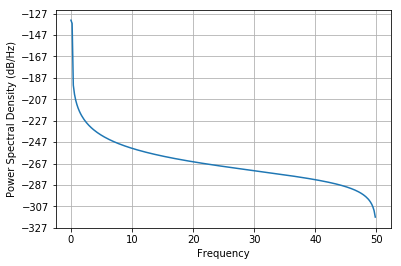

In [225]:
def Curles_loadingNoise(y_int,c_sound,r_dist,L,dt,Velo):
    p_acoustic = (((y_int*L)/(4*np.pi*dt*c_sound*(r_dist**2)))*(0.5*1.225*pow(Velo,2)))
    return p_acoustic

noise = Curles_loadingNoise(1,343,1,G,ts,v0)
# print noise
H = ((noise)/(2.e-5))**2
# print H
(val, freq) = psd(H, NFFT=512,Fs=1/ts,detrend='mean')
SPL = 10*np.log10(val)
print SPL

### Plot unsteady lift on the airfoil and the SPL in far-field 

ValueError: x and y must have same first dimension, but have shapes (2000L,) and (100L,)

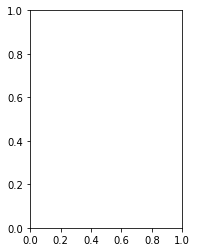

In [199]:
plt.figure(1)
plt.subplot(1,2,1)
plt.plot(t,G,label='cl')
plt.title('Unsteady coefficient of lift')
plt.xlabel('time, s')
plt.ylabel('cl')
plt.legend()
plt.subplot(1,2,2)
(val, freq) = psd(H, NFFT=512,Fs=1/ts,detrend='mean')
plt.semilogx(freq,10*np.log10(val),label='SPL')
plt.title('Sound Pressure Level (dB)')
plt.xlabel('Frequency')
plt.ylabel('SPL, dB')
plt.legend()
plt.savefig('cl_SPL.pdf')
plt.show